In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [24]:
!pip install -U scikit-learn

  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------- ------------------------------ 2.6/11.0 MB 15.1 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 12.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 13.4 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 10.6 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [110]:
train = pd.read_csv('.\\train.csv',index_col= 'id')
test = pd.read_csv('.\\test.csv',index_col= 'id')

In [3]:
col  = train.columns
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387


In [4]:
train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37137 entries, 0 to 37136
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       37137 non-null  float64
 1   HouseAge     37137 non-null  float64
 2   AveRooms     37137 non-null  float64
 3   AveBedrms    37137 non-null  float64
 4   Population   37137 non-null  float64
 5   AveOccup     37137 non-null  float64
 6   Latitude     37137 non-null  float64
 7   Longitude    37137 non-null  float64
 8   MedHouseVal  37137 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [89]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
211,12.2138,2.0,9.860169,1.114407,3082.0,3.809322,33.58,-117.36,5.00001
298,12.2145,52.0,8.444954,1.100917,726.0,3.178899,34.11,-118.33,5.00001
468,6.3702,7.0,8.305344,1.289945,3817.0,2.577844,37.34,-122.22,5.00001
1222,6.8806,52.0,8.564179,1.773134,500.0,1.492537,34.06,-118.33,5.00001
1469,15.0001,45.0,8.022599,0.948328,1059.0,2.835341,34.09,-118.41,5.00001
...,...,...,...,...,...,...,...,...,...
36048,10.3329,18.0,8.874233,1.050181,2980.0,4.663121,34.07,-118.40,5.00001
36117,3.8510,17.0,6.147668,1.721495,1351.0,2.847305,40.95,-124.14,1.61700
36156,3.8571,10.0,12.808511,3.067460,1336.0,2.285714,33.69,-116.38,2.20000


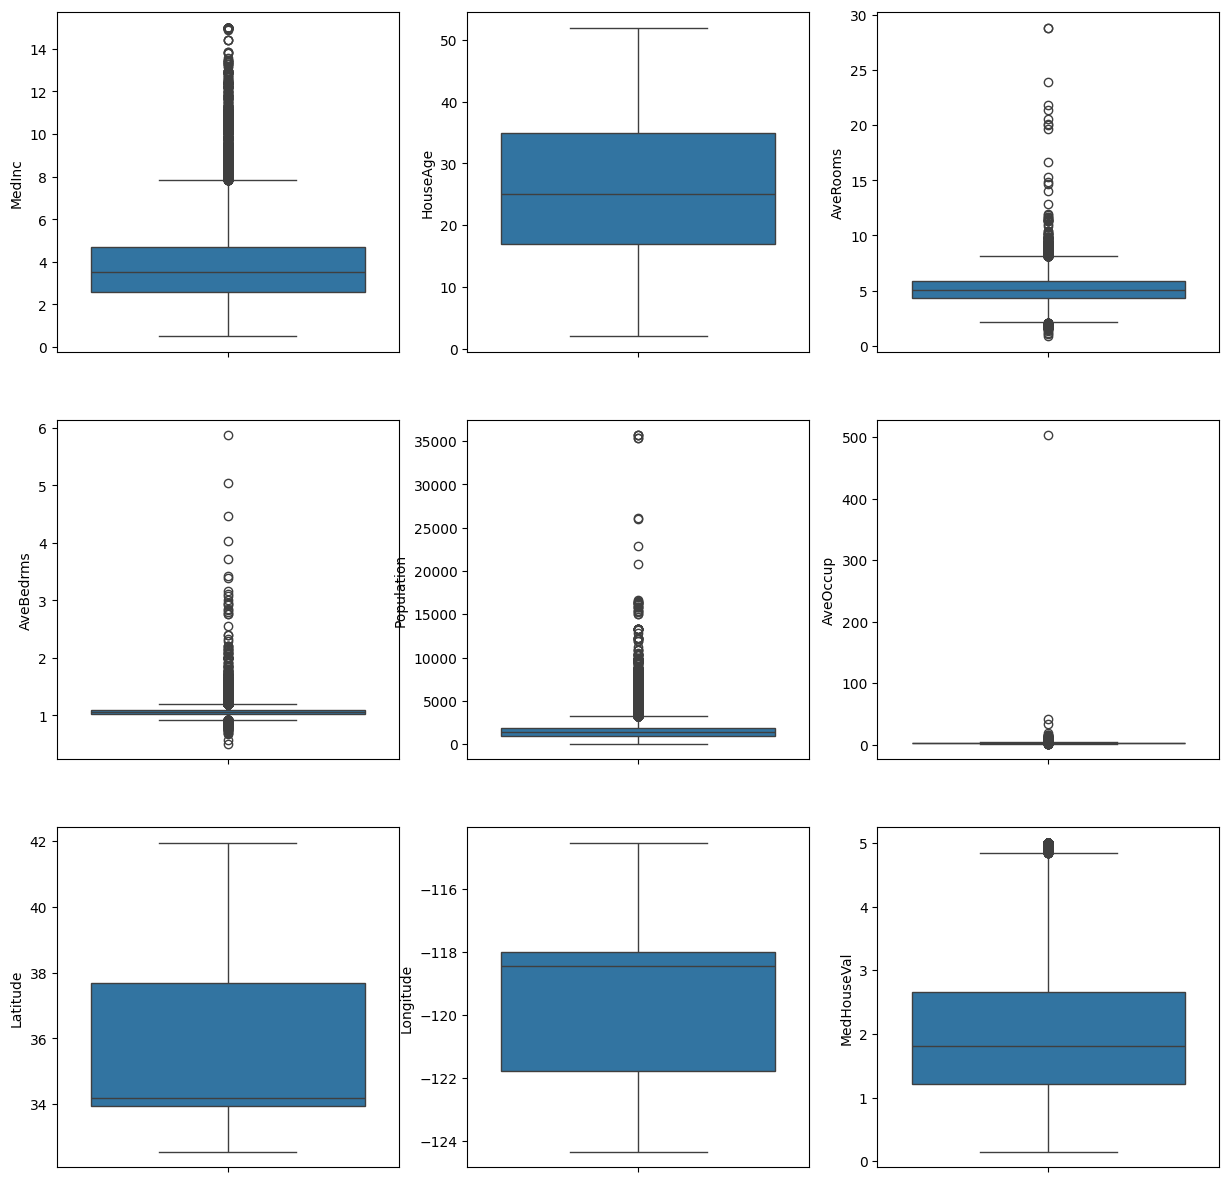

In [85]:
plt.figure(figsize=(15,15))
for i,colu in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.boxplot(train[colu])

In [111]:
train = pd.read_csv('.\\train.csv',index_col= 'id')
def remove_outlier(col:str,df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df[col]

for i in col:
    if i not in ["Latitude","Longitude"]:
        train[i] = remove_outlier(i,train)
train.dropna()

In [118]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37131,2.6913,17.0,3.492991,1.093207,1135.0,2.573770,34.20,-118.48,2.063
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387


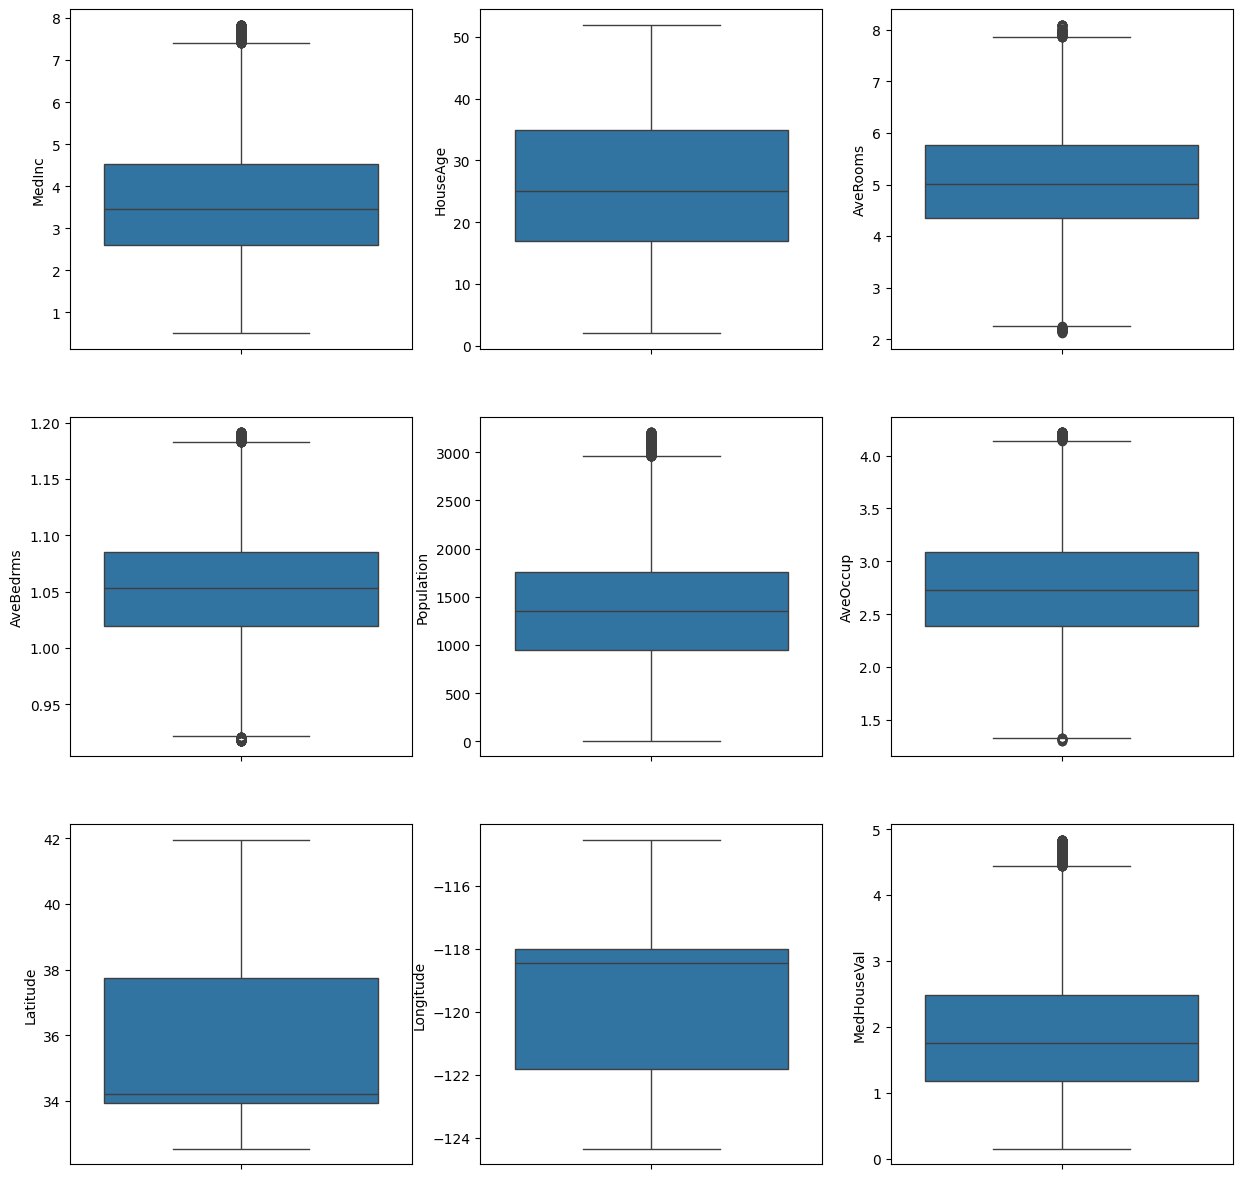

In [117]:
plt.figure(figsize=(15,15))
for i,colu in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.boxplot(train[colu])

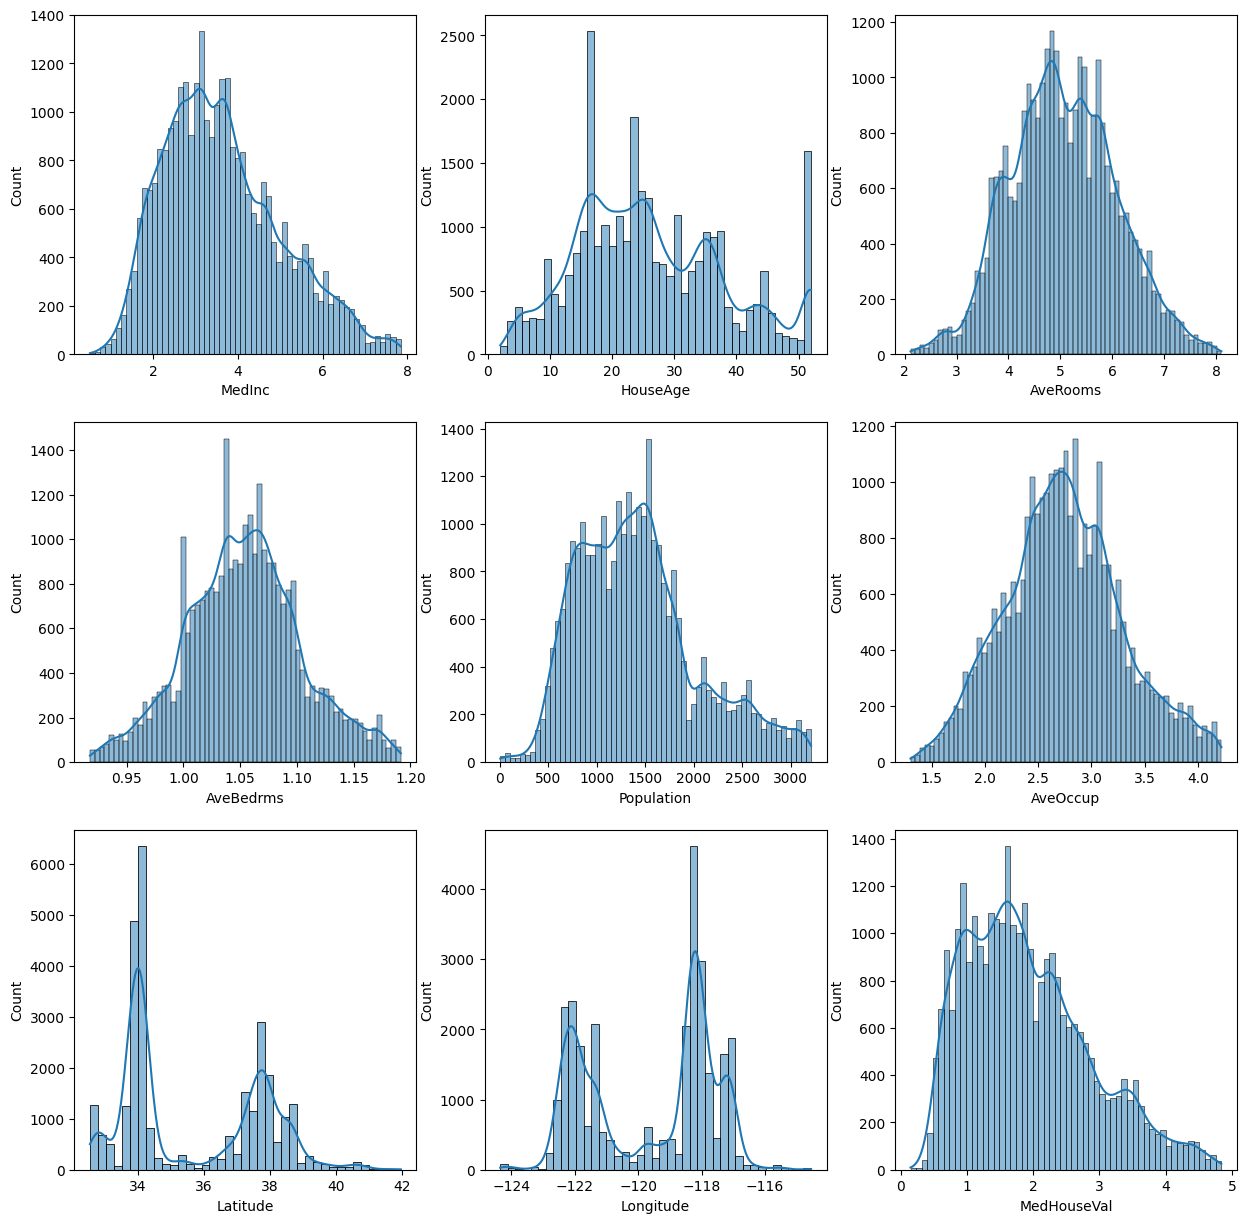

In [119]:
plt.figure(figsize=(15,15))
for i,colu in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.histplot(train[colu], kde=True)

In [120]:
# train['MedInc'] = np.log(train['MedInc'])
# train['AveBedrms'] = np.log(train['AveBedrms'])
# train['Population'] = np.log(train['Population'])
train.skew()

MedInc         0.587459
HouseAge       0.433542
AveRooms       0.118248
AveBedrms      0.110144
Population     0.696380
AveOccup       0.196707
Latitude       0.374215
Longitude     -0.257223
MedHouseVal    0.701291
dtype: float64

<AxesSubplot:>

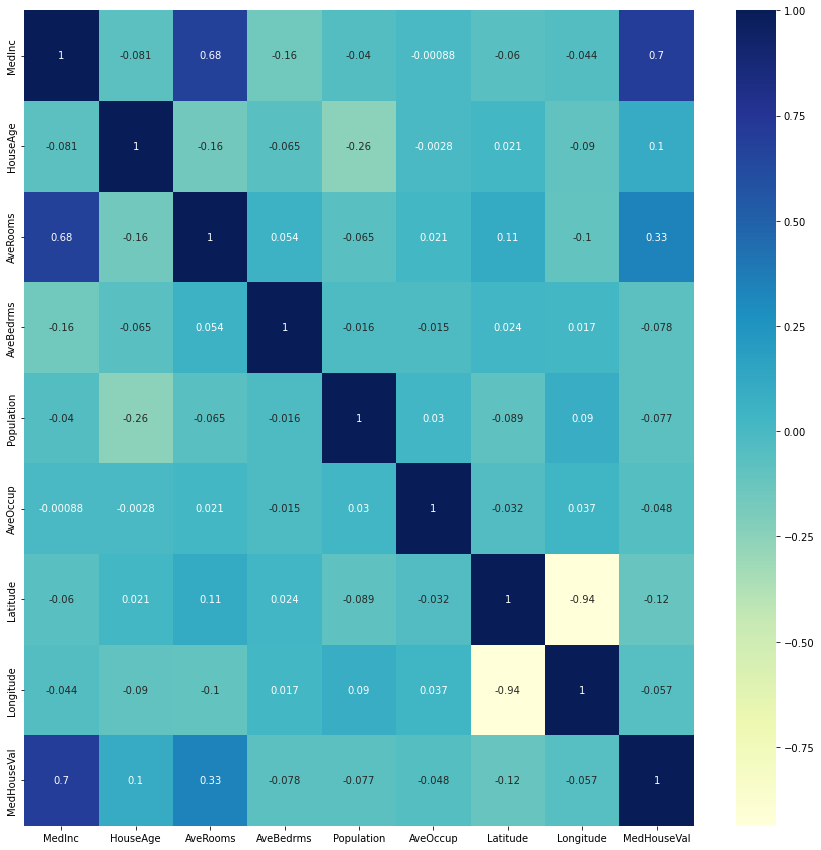

In [9]:
plt.figure(figsize= (15, 15))
sns.heatmap(train.corr(), annot = True,cmap="YlGnBu")

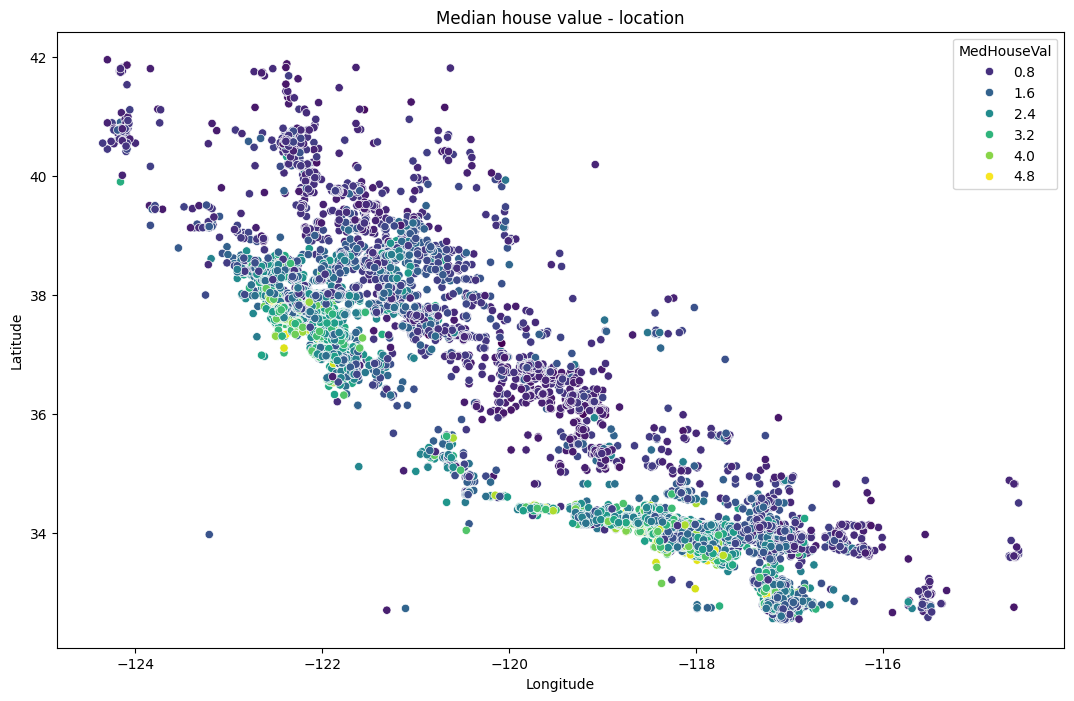

In [121]:
plt.figure(figsize=(13,8))
sns.scatterplot(data = train, x = "Longitude", y = "Latitude",hue = "MedHouseVal", palette = "viridis")
plt.title("Median house value - location")
plt.show()

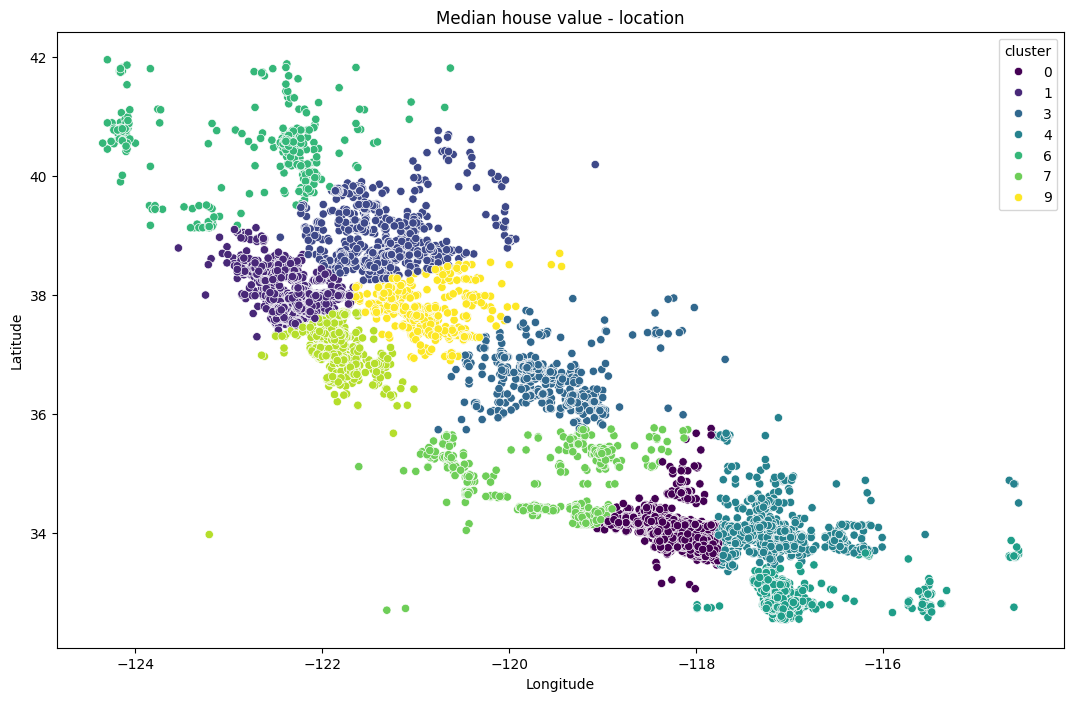

In [122]:
from sklearn.cluster import KMeans
kmeans =  KMeans(n_clusters=10).fit(train.iloc[:,6:8])
train['cluster'] = kmeans.labels_
kmeans =  KMeans(n_clusters=10).fit(test.iloc[:,6:8])
test['cluster'] = kmeans.labels_
plt.figure(figsize=(13,8))
sns.scatterplot(data = train, x = "Longitude", y = "Latitude",hue = "cluster", palette = "viridis")
plt.title("Median house value - location")
plt.show()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,cluster
id,,,,,,,,,
37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85,6
37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29,3
37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81,9
37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34,3
37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29,3
...,...,...,...,...,...,...,...,...,...
61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75,7
61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96,9
61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83,0


In [20]:
from sklearn.model_selection import train_test_split
X = train.drop(['MedHouseVal'],1)
y =train['MedHouseVal']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

C:\Users\shuga\AppData\Local\Temp\ipykernel_7052\1058523071.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop(['MedHouseVal'],1)


In [21]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
clf = CatBoostRegressor()
clf.fit(X_train, y_train, verbose=False)
preds = clf.predict(X_test.values)
print(mean_squared_error(y_test, preds, squared=False))

0.5651349041135845
